In [1]:
%matplotlib inline
from pylab import *
from sci378 import *
import pandas as pd

Version:  0.0.25


In [2]:
from pyndamics3 import Simulation

pyndamics3  version  0.0.31


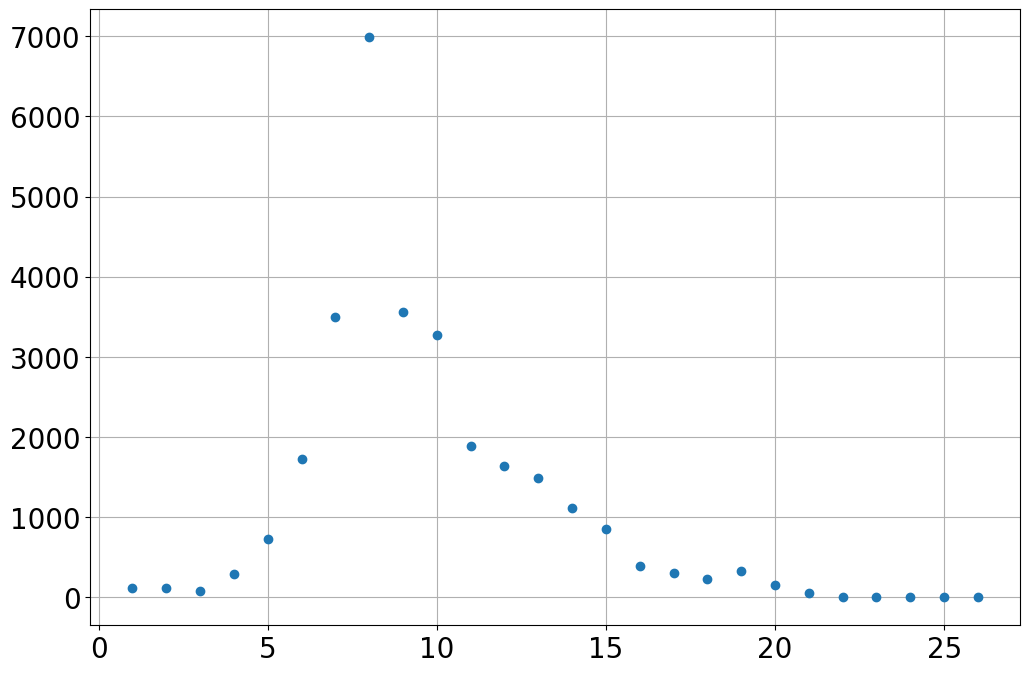

In [3]:
data=pd.read_csv('../data/ebola_data.csv')
data

t_data=data['month']
z_data=data['total cases']
plot(t_data,z_data,'o')

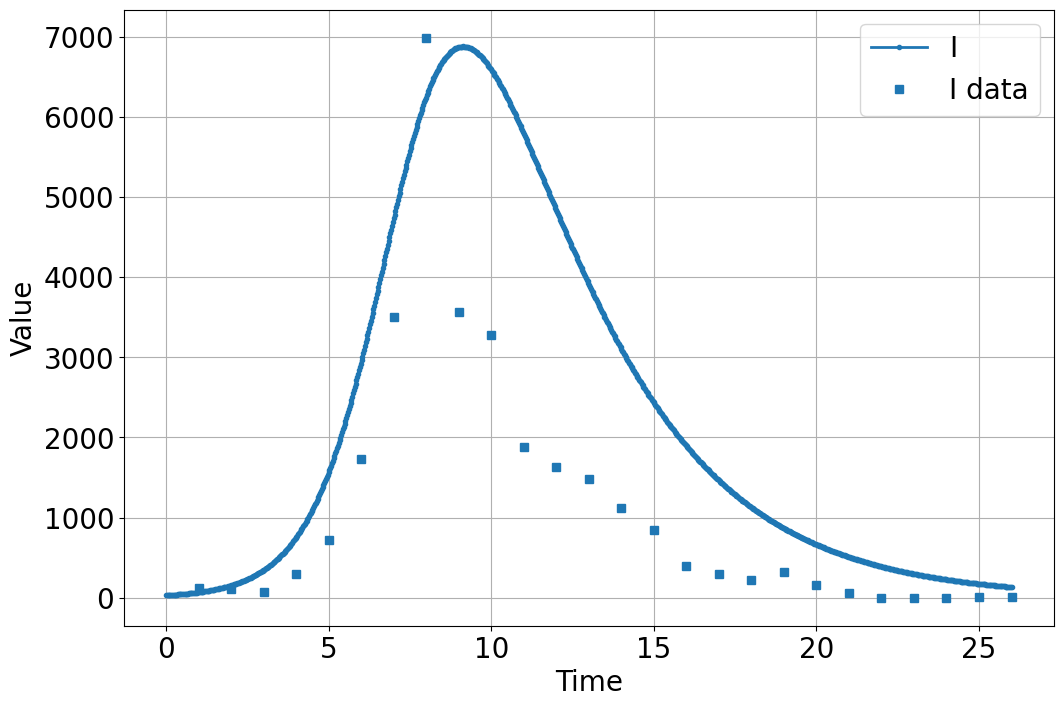

<Figure size 1200x800 with 0 Axes>

In [17]:
sim=Simulation()
sim.add(" S' = -β*S*I/N   ",18000)
sim.add(" I' = β*S*I/N - γ*I",30,plot=True)
sim.add(" R' = γ*I",6000)
sim.add(" N = S+I+R")
sim.params(β=1.5,γ=.3)
sim.add_data(t=t_data,I=z_data,plot=True)
sim.run(26)

In [18]:
from pyndamics3.mcmc import *

In [19]:
model=MCMCModel(sim,
                γ=Uniform(0,1), 
                β=Normal(1.5,.1,all_positive=True),
                initial_I=Normal(30,10,all_positive=True),
               )

Sampling Prior...
Done.
1.27 s
Running MCMC 1/3...
Done.
1 m, 1.58 s
Running MCMC 2/3...
Done.
1 m, 5.60 s
Running MCMC 3/3...
Done.
1 m, 3.84 s


<Figure size 1200x800 with 0 Axes>

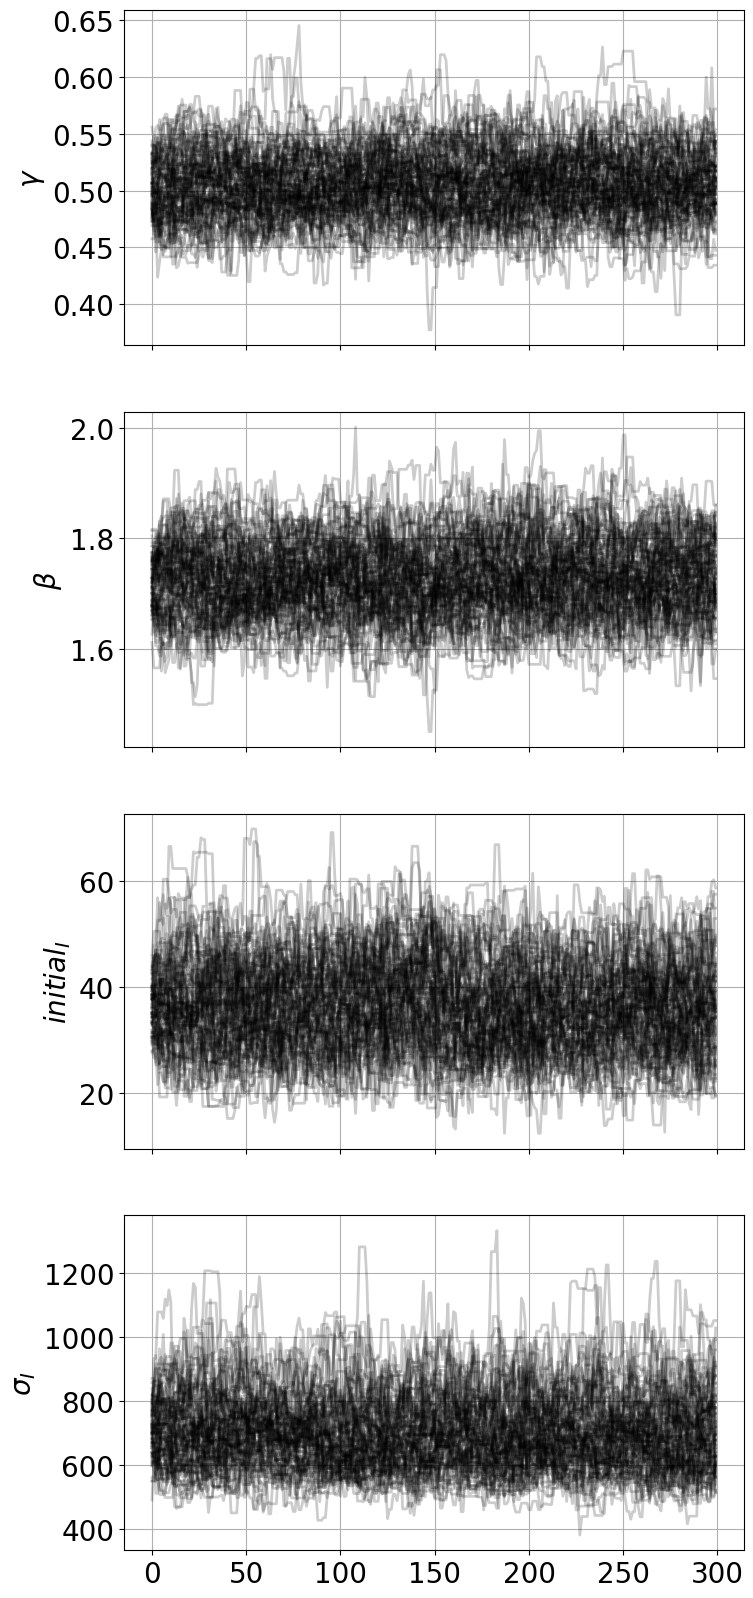

In [20]:
model.run_mcmc(300,repeat=3)
model.plot_chains()

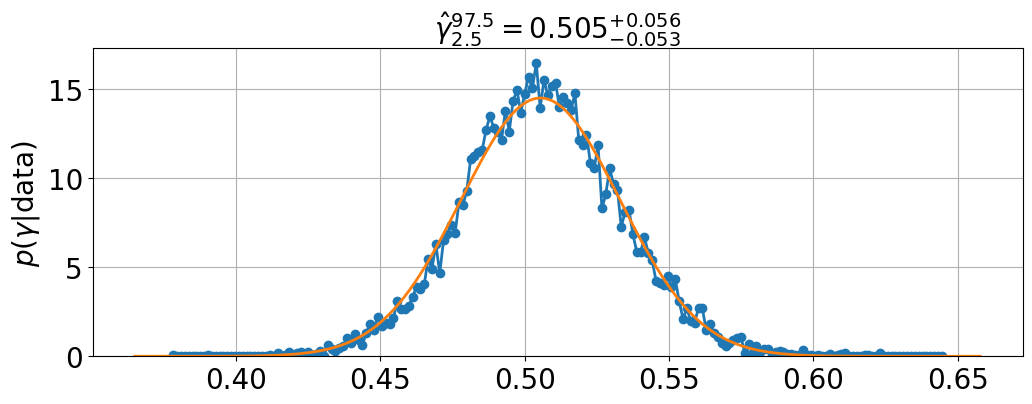

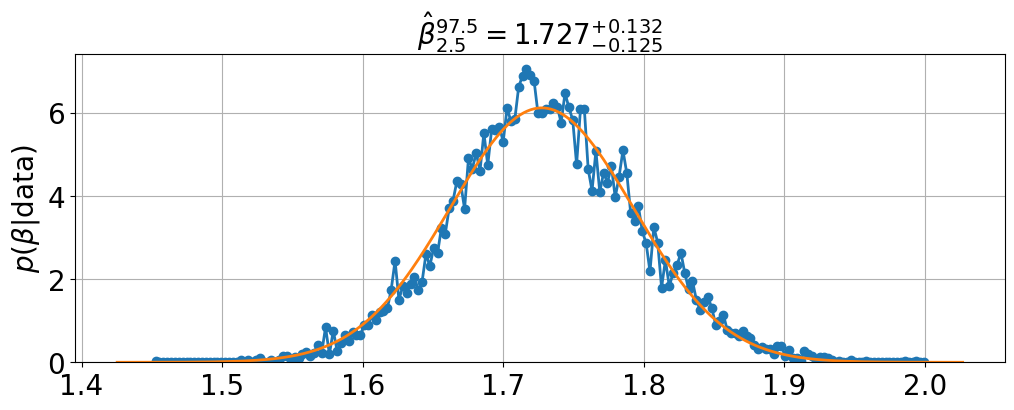

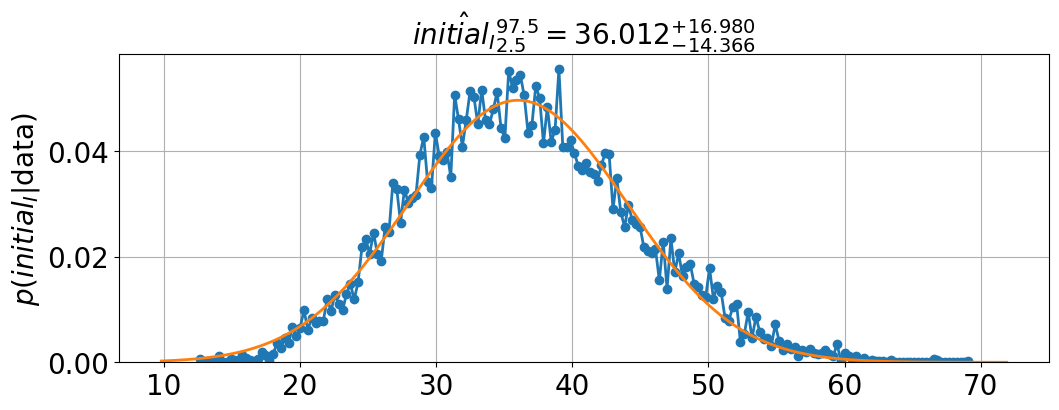

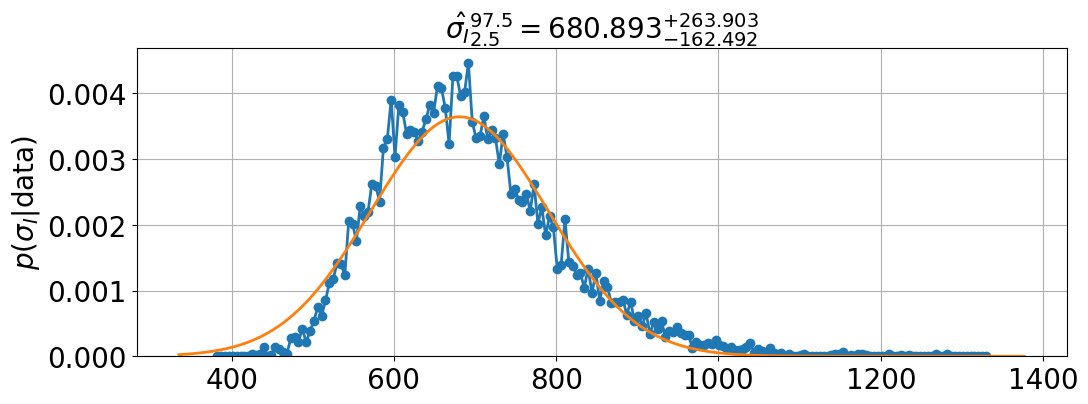

In [21]:
model.plot_distributions()

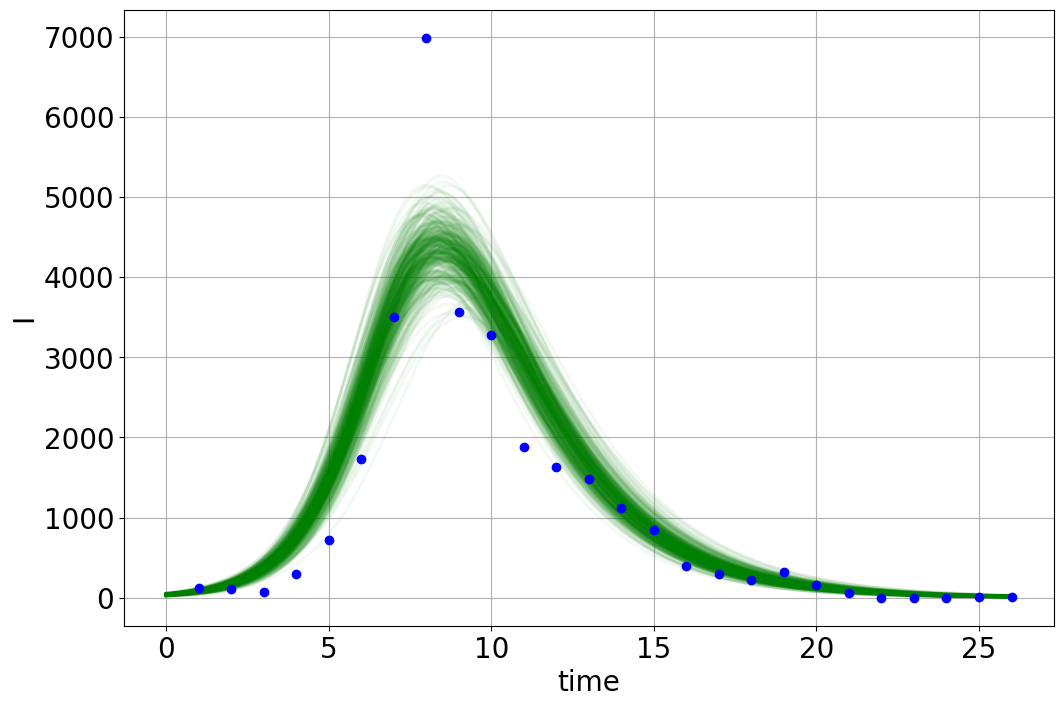

In [22]:
model.plot_many(0,26,'I',N=400)

In [ ]:
β γ